In [ ]:
!pip install pandas
!pip install SPARQLWrapper 

In [ ]:
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

# Beschäftigung der Namensgeberinnen

In [104]:
def createQueryFemalOccup():
    
    wdUrl = "https://query.wikidata.org/sparql"
    user_agent = 'Streetnamequery/1.0 (https://github.com/CaptainInler/equalstreetnames-zurich-QS)'
    sparql = SPARQLWrapper(wdUrl, agent=user_agent)
    
    #print(wdKey)
    query = """
    SELECT ?formLabel (Count(?formLabel) as ?maxformLabel) 
    WHERE 
    {
      ?item wdt:P131 wd:Q72;
            wdt:P138 ?person.
      ?person wdt:P21 wd:Q6581072;
              wdt:P31 wd:Q5;
              wdt:P106 ?occu.
      ?occu wdt:P2521 ?form.

      FILTER (lang(?form)="de")

      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". } 
    }
    GROUP BY ?formLabel
    ORDER BY DESC(?maxformLabel)
    LIMIT 10
    """
    #print(query)
    
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql

In [106]:
sparql = createQueryFemalOccup()

In [107]:
results = ""

try:
    results = sparql.query()
    #print(results.info())
except HTTPError as e:
    print(f"{i} Anfragen ausgeführt")
    #Prüfen auf Statuscode 429 (Too many Requests)
    if e.status == 429:
        print(f'Statuscode 429 aufgetreten: Neu Anfrage in {e.headers.get("retry-after")}sec möglich')
        sleep(int(e.headers.get("retry-after"))+2)
    else:
        raise
        
result = results.convert()
#print(result)
results_df = pd.json_normalize(result['results']['bindings'])


In [108]:
results_df.head(10)

,formLabel.type,formLabel.value,maxformLabel.datatype,maxformLabel.type,maxformLabel.value
0,literal,Schriftstellerin,http://www.w3.org/2001/XMLSchema#integer,literal,16
1,literal,Politikerin,http://www.w3.org/2001/XMLSchema#integer,literal,7
2,literal,Kinderbuchautorin,http://www.w3.org/2001/XMLSchema#integer,literal,5
3,literal,Journalistin,http://www.w3.org/2001/XMLSchema#integer,literal,5
4,literal,Frauenrechtlerin,http://www.w3.org/2001/XMLSchema#integer,literal,5
5,literal,Dichterin,http://www.w3.org/2001/XMLSchema#integer,literal,5
6,literal,Romancière,http://www.w3.org/2001/XMLSchema#integer,literal,4
7,literal,Ärztin,http://www.w3.org/2001/XMLSchema#integer,literal,4
8,literal,Herausgeberin,http://www.w3.org/2001/XMLSchema#integer,literal,4
9,literal,Architektin,http://www.w3.org/2001/XMLSchema#integer,literal,4


In [110]:
df = results_df[["formLabel.value","maxformLabel.value"]]

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   formLabel.value     10 non-null     object
 1   maxformLabel.value  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [112]:
df['maxformLabel.value'] = df['maxformLabel.value'].astype(int)

/tmp/ipykernel_57/806153329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maxformLabel.value'] = df['maxformLabel.value'].astype(int)


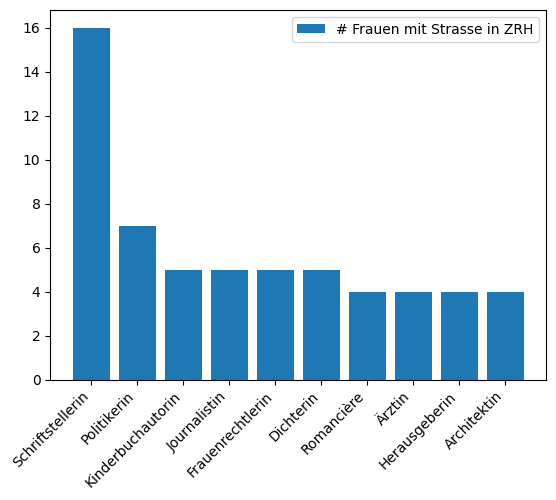

In [113]:
fig1, ax1 = plt.subplots()
ax1.bar(df["formLabel.value"], df["maxformLabel.value"])
ax1.legend(['# Frauen mit Strasse in ZRH'])
plt.xticks(rotation=45, ha='right')
plt.show()

# Beschäftigung der Männer

In [105]:
def createQueryMaleOccup():
    
    wdUrl = "https://query.wikidata.org/sparql"
    user_agent = 'Streetnamequery/1.0 (https://github.com/CaptainInler/equalstreetnames-zurich-QS)'
    sparql = SPARQLWrapper(wdUrl, agent=user_agent)
    
    #print(wdKey)
    query = """
    SELECT ?formLabel (Count(?formLabel) as ?maxformLabel) 
    WHERE 
    {
      ?item wdt:P131 wd:Q72;
            wdt:P138 ?person.
      ?person wdt:P21 wd:Q6581097;
              wdt:P31 wd:Q5;
              wdt:P106 ?form.

      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],de". } 
    }
    GROUP BY ?formLabel
    ORDER BY DESC(?maxformLabel)
    LIMIT 10
    """
    #print(query)
    
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql

In [6]:
sparql = createQueryMaleOccup()

In [7]:
results = ""

try:
    results = sparql.query()
    #print(results.info())
except HTTPError as e:
    print(f"{i} Anfragen ausgeführt")
    #Prüfen auf Statuscode 429 (Too many Requests)
    if e.status == 429:
        print(f'Statuscode 429 aufgetreten: Neu Anfrage in {e.headers.get("retry-after")}sec möglich')
        sleep(int(e.headers.get("retry-after"))+2)
    else:
        raise
        
result = results.convert()
#print(result)
results_df = pd.json_normalize(result['results']['bindings'])

In [116]:
df = results_df[["formLabel.value","maxformLabel.value"]]
df['maxformLabel.value'] = df['maxformLabel.value'].astype(int)

/tmp/ipykernel_57/1485871073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maxformLabel.value'] = df['maxformLabel.value'].astype(int)


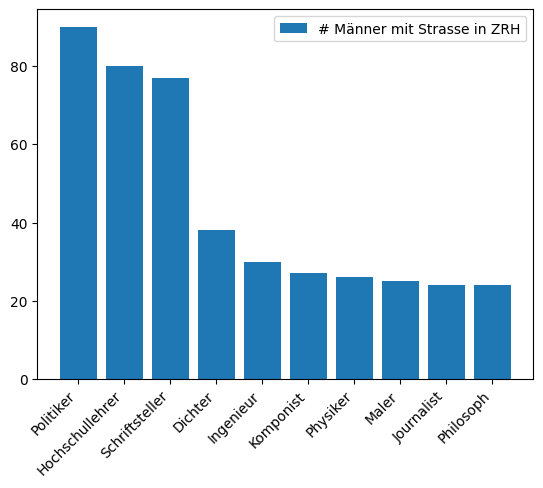

In [117]:
fig1, ax1 = plt.subplots()
ax1.bar(df["formLabel.value"], df["maxformLabel.value"])
ax1.legend(['# Männer mit Strasse in ZRH'])
plt.xticks(rotation=45, ha='right')
plt.show()

# Durchschnittsalter

In [5]:
def createQueryMaleOccup():
    
    wdUrl = "https://query.wikidata.org/sparql"
    user_agent = 'Streetnamequery/1.0 (https://github.com/CaptainInler/equalstreetnames-zurich-QS)'
    sparql = SPARQLWrapper(wdUrl, agent=user_agent)
    
    #print(wdKey)
    query = """
    SELECT ?person ?personLabel (2023 -year(?gebur) as ?alter )
    WHERE 
    {
      ?item wdt:P131 wd:Q72;
            wdt:P138 ?person.
      ?person wdt:P21 wd:Q6581097;
              wdt:P31 wd:Q5;
              wdt:P569 ?gebur.

      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],de". } 
    }
    """
    #print(query)
    
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql

In [8]:
results_df.head()

,person.type,person.value,personLabel.xml:lang,personLabel.type,personLabel.value,alter.datatype,alter.type,alter.value
0,uri,http://www.wikidata.org/entity/Q5879,de,literal,Johann Wolfgang von Goethe,http://www.w3.org/2001/XMLSchema#integer,literal,274
1,uri,http://www.wikidata.org/entity/Q7312,de,literal,Franz Schubert,http://www.w3.org/2001/XMLSchema#integer,literal,226
2,uri,http://www.wikidata.org/entity/Q22670,de,literal,Friedrich Schiller,http://www.w3.org/2001/XMLSchema#integer,literal,264
3,uri,http://www.wikidata.org/entity/Q30693,de,literal,Rudolf Clausius,http://www.w3.org/2001/XMLSchema#integer,literal,201
4,uri,http://www.wikidata.org/entity/Q61058,de,literal,Ludwig Uhland,http://www.w3.org/2001/XMLSchema#integer,literal,236


In [12]:
results_df['alter.value'] = results_df['alter.value'].astype(int)

In [17]:
results_df['alter.value'].median()

190.0